In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Utils

In [ ]:
def calculate_average(matrix):
	sum = 0
	size = len(matrix)
	for i in range(size):
		for j in range(size):
			sum += matrix[i][j]

	return sum // (size*size)

In [ ]:
def plot_image(image, nth, title, row = 1):
  plt.subplot(row, 5, nth)
  plt.imshow(image, cmap='gray')
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

In [ ]:
def plot_image_little(image, nth, title):
  plt.subplot(1, 8, nth)
  plt.imshow(image, cmap='gray')
  plt.subplots_adjust(right=3.5, wspace=1)
  plt.title(title)

In [ ]:
def plot(image, nth, title):
  plt.subplot(1, 5, nth)
  plt.plot(image)
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

In [ ]:
# calculate mean square error
def MSE(x, y):
    return np.square(np.subtract(x, y)).mean()

# Filters

## box filter

In [ ]:
def box_filter_cv2(image, k):
  kernel = np.ones((k,k), dtype='uint8') / (k*k)
  out = cv2.filter2D(image, -1, kernel)
  return out

In [ ]:
def calculate_neighbors_ave(image, i, j, k):
  sum = 0;
  row = len(image)
  col = len(image[0])

  # d is neigbor raduis
  d = k//2

  x1 = min(0, i - d)
  x2 = min(row-1, i + d)

  y1 = min(0, j - d)
  y2 = min(col-1, j + d)

   # calculate sum of neighbors (i-d, j-d, i+d, j+d)
  for i in range(x1, x2):
    for j in range(y1, y2):
        sum += image[i][j]

  return sum // (k*k)

In [ ]:
def box_filter(k, image):
    row = len(image)
    col = len(image[0])
    out = np.zeros((row, col), dtype='uint8')

    for i in range(row-k):
        for j in range(row-k):
            out[i][j] = calculate_neighbors_ave(image, i, j, k)

    return out

In [ ]:
def box_filter_multiple_times(image, k, n):
  img = np.copy(image)
  for i in range(n):
    img = box_filter_cv2(img, k)

  return img

In [ ]:
def box_filter_for_multiple_inputs(images, k):
  outs = []
  for img in images:
    outs.append(box_filter(k,img))

  return outs

## laplacian filter

In [ ]:
# laplacian with mask : ([ 0 -1  0;
#                         -1  5 -1;
#                          0 -1  0])

def laplacian(image):
  row, col = image.shape
  out = np.zeros((row, col))
  for i in range(row):
    for j in range(col):
      sum = 4 * image[i][j]
      if(i - 1 >= 0):
        sum += image[i-1][j] * -1
      if(i + 1 < row):
        sum += image[i+1][j] * -1
      if(j - 1 >= 0):
        sum += image[i][j-1] * -1
      if(j + 1 < col):
        sum += image[i][j+1] * -1

      out[i][j] = sum

  return out

In [ ]:
def laplacian_mutiple_times(image,n):
  img = np.copy(image)
  for i in range(n):
    img = laplacian(img)

  return img

## median filter

In [ ]:
def median_filter(image, window_size):
    temp = []

    # d is window radius
    d = window_size // 2

    out = []
    h = len(image)
    w = len(image[0])

    data_final = np.zeros((h,w))

    for i in range(h):
        for j in range(w):

            for z in range(window_size):
                x = i + z - d
                # out of horizontal bound
                if x < 0 or x > h - 1:
                    for c in range(window_size):
                        temp.append(0)
                else:
                    # out of vertical bound
                    if j + z - d < 0 or j + d > w - 1:
                        temp.append(0)

                    # in the bound
                    else:
                        for k in range(window_size):
                            temp.append(image[x][j + k - d])

            temp.sort()
            # find median
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


In [ ]:
def median_filter_for_multiple_inputs(images, w_size):
  outs = []
  for img in images:
    outs.append(median_filter(img,w_size))

  return outs

In [ ]:
def median_filter_with_multiple_window_size(image, w_sizes):
  outs = []
  for w in w_sizes:
    outs.append(median_filter(image,w))

  return outs

## gussian filter


In [ ]:
def gaussian_filter(image, kernel_size=(5, 5), sigma=1.0):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    return blurred

## unsharp masking

In [ ]:
def unsharp(image, filter, alpha):
  x, y = image.shape
  diff = np.zeros((x,y))
  for i in range(x):
    for j in range(y):
      diff[i][j] = (filter[i][j] - image[i][j])*alpha
  print(diff)
  return image + diff

### a x-direction filter

In [ ]:
# a filter with mask : ([  1  0 -1])

def a_x_dir_filter(image):
  row, col = image.shape
  out = np.zeros((row, col))
  for i in range(row):
    for j in range(col):
      sum = 0
      if(i - 1 >= 0):
        sum += image[i-1][j]

      if(i + 1 < row):
        sum += image[i+1][j] * -1


      out[i][j] = sum

  return out

### b x-direction filter

In [ ]:
# b filter with mask : ([  1  0 -1;
#                          1  0 -1;
#                          1  0 -1])

def b_x_dir_filter(image):
  row, col = image.shape
  out = np.zeros((row, col))
  for i in range(row):
    for j in range(col):
      sum = 0
      if(i - 1 >= 0):
        sum += image[i-1][j]
        if(j - 1>=0):
          sum += image [i-1][j-1]
        if(j + 1 < col):
          sum += image [i-1][j+1]

      if(i + 1 < row):
        sum += image[i+1][j] * -1
        if(j - 1>=0):
          sum += image [i+1][j-1] * -1
        if(j + 1 < col):
          sum += image [i+1][j+1] * -1

      out[i][j] = sum

  return out

### c x-direction filter

In [ ]:
# c filter with mask : ([  1  0 -1;
#                          2  0 -2;
#                          1  0 -1])

def c_x_dir_filter(image):
  row, col = image.shape
  out = np.zeros((row, col))
  for i in range(row):
    for j in range(col):
      sum = 0
      if(i - 1 >= 0):
        sum += image[i-1][j]
        if(j - 1>=0):
          sum += image [i-1][j-1] * 2
        if(j + 1 < col):
          sum += image [i-1][j+1]

      if(i + 1 < row):
        sum += image[i+1][j] * -1
        if(j - 1>=0):
          sum += image [i+1][j-1] * -2
        if(j + 1 < col):
          sum += image [i+1][j+1] * -1

      out[i][j] = sum

  return out

# Noise generate

In [ ]:
# s_vs_p: salt to pepper ratio
# noise_density: what percent of image should replace with salt or pepper
def salt_pepper_noise(image, s_vs_p, noise_density):
    out = np.copy(image)

    # Salt mode
    # number of white(1) pixels
    num_salt = np.ceil(noise_density * image.size * s_vs_p)

    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # put 1 in random generated points
    out[coords] = 1

    # Pepper mode
    # number of black(0) pixels
    num_pepper = np.ceil(noise_density* image.size * (1. - s_vs_p))

    coords = [np.random.randint(0, i - 1, int(num_pepper))  for i in image.shape]

    # put 1 in random generated points
    out[coords] = 0
    return out

In [ ]:
def gussian_noise(image, variance = 0.1):
   row,col= image.shape
   mean = 0
   sigma = variance**0.5

   gauss = np.random.normal(mean,sigma,(row,col))
   gauss = gauss.reshape(row,col)

   # add random values to pixels
   noisy = image + gauss
   return np.uint8(noisy)


# Practice 3.1

### practice 3.1.1

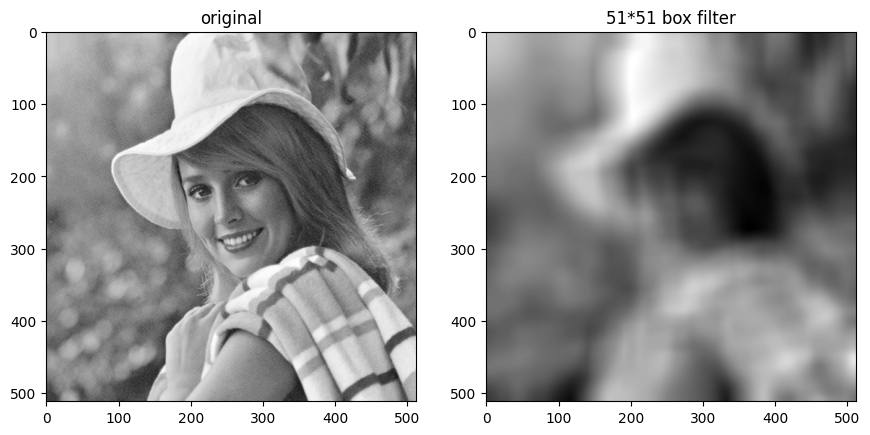

In [26]:
# practice 3.1.1

elaine = cv2.imread('Elaine.bmp', cv2.IMREAD_GRAYSCALE)
plot_image(elaine, 1,'original')
plot_image(box_filter_cv2(elaine, 51), 2, '51*51 box filter')
plt.show()

###practice 3.1.2

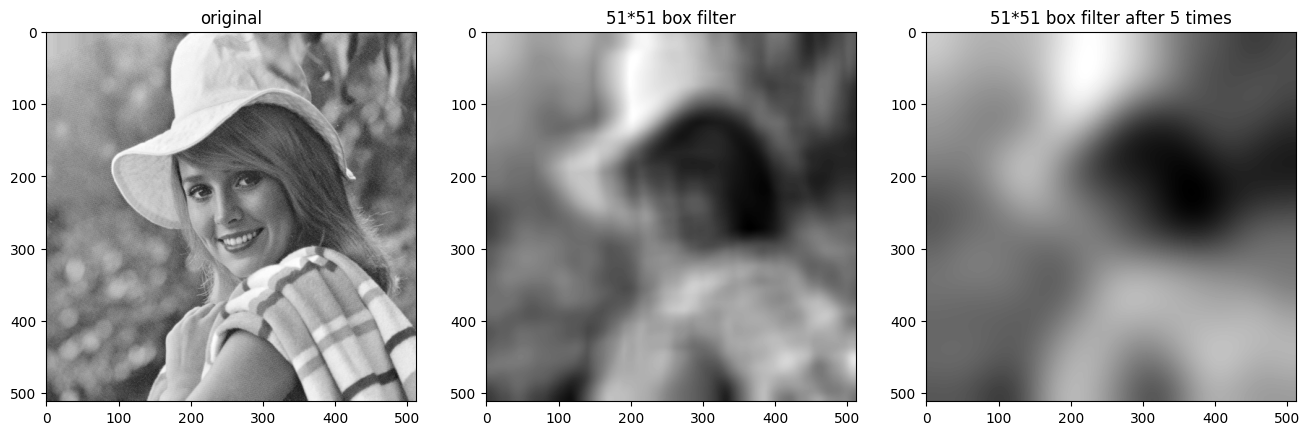

In [27]:
# practice 3.1.2

plot_image(elaine, 1,'original')
plot_image( box_filter_cv2(elaine, 51), 2, '51*51 box filter')

plot_image(box_filter_multiple_times(elaine , 51, 5), 3, '51*51 box filter after 5 times')
plt.show()

### practice 3.1.3

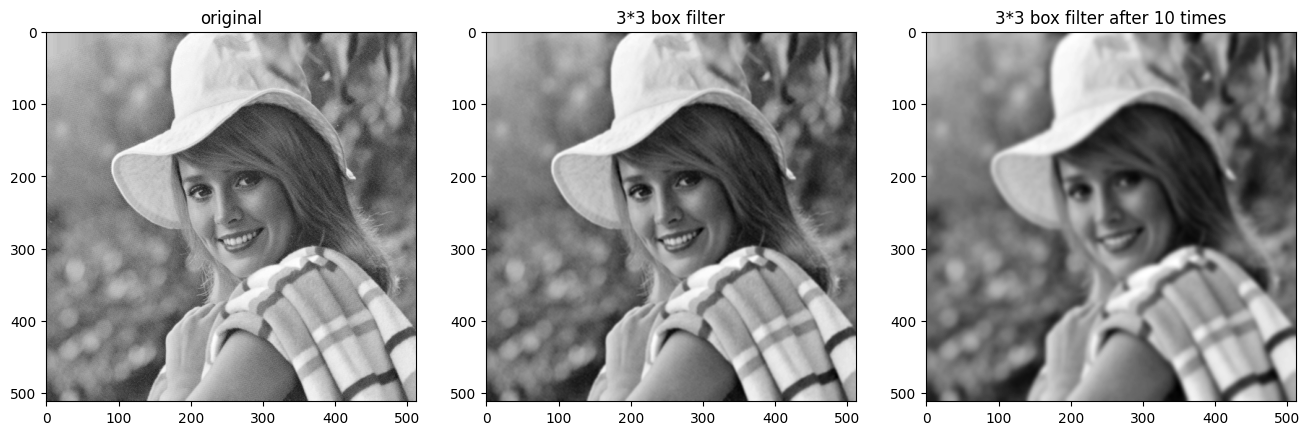

In [28]:
# practice 3.1.3

plot_image(elaine, 1, 'original')
plot_image(box_filter_cv2(elaine,3), 2, '3*3 box filter')
plot_image(box_filter_multiple_times(elaine, 3, 10),3,'3*3 box filter after 10 times')

plt.show()

### practice 3.1.5

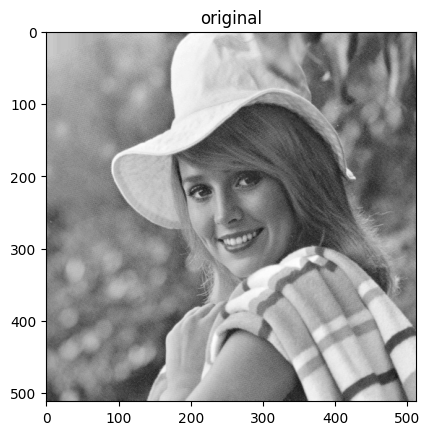

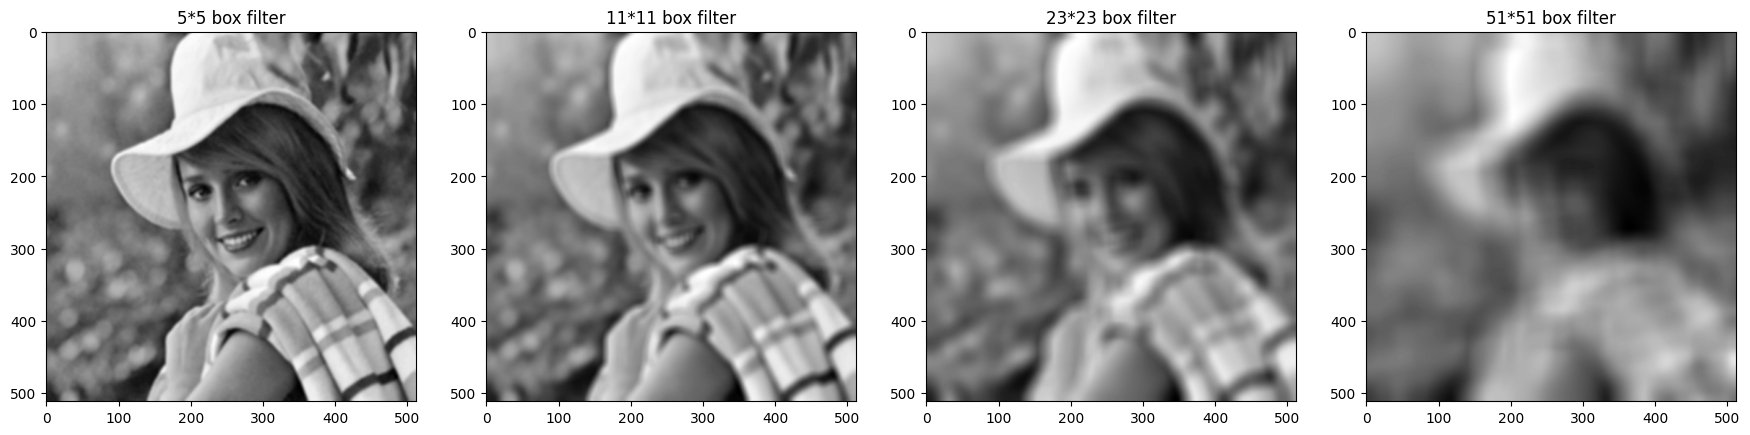

In [29]:
# practice 3.1.5

plot_image(elaine, 1, 'original')
plt.show()

col = 1
for k in [5, 11, 23, 51]:
  plot_image(box_filter_cv2(elaine, k), col, '{}*{} box filter'.format(k, k))
  col+=1

plt.show()

### practice 3.1.6

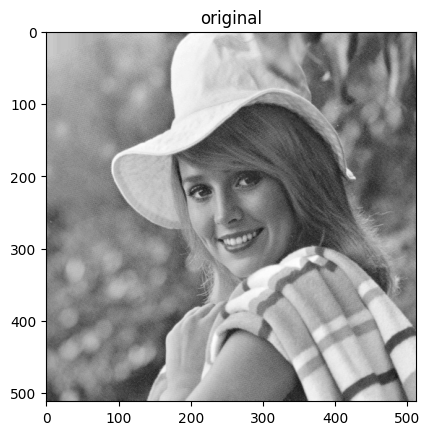

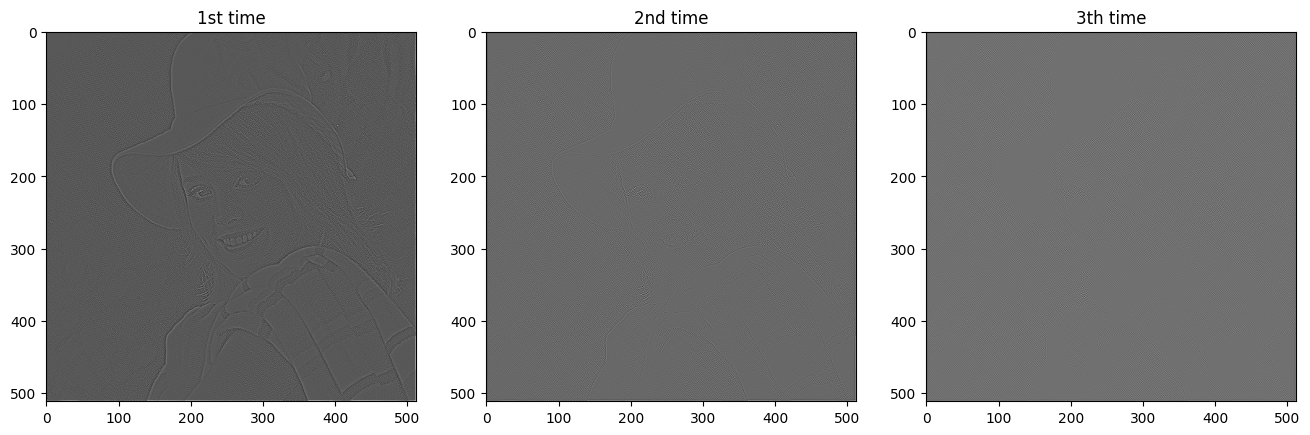

In [30]:
# practice 3.1.6

plot_image(elaine, 1, 'original')
plt.show()

plot_image(laplacian_mutiple_times(elaine, 1), 1, '1st time')
plot_image(laplacian_mutiple_times(elaine, 2), 2, '2nd time')
plot_image(laplacian_mutiple_times(elaine, 3), 3, '3th time')

plt.show()


# Practice 3.2

### practice 3.2.1

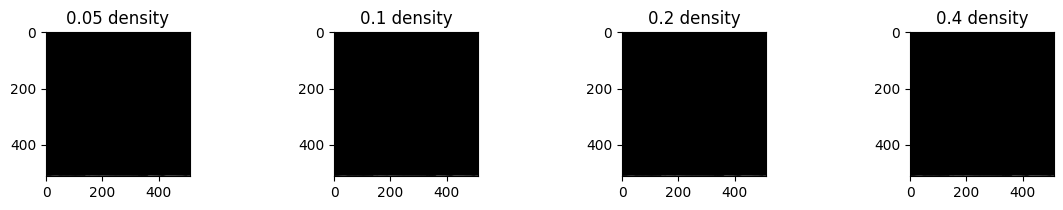

  window size           3*3           5*5           7*7           9*9  \
0    𝝆 = 0.05  20714.231468  20714.231468  20714.231468  20714.231468   

          11*11  
0  20714.231468  


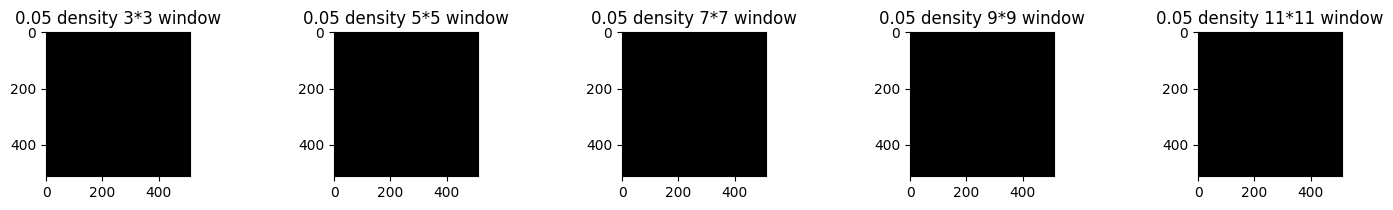

  window size           3*3           5*5           7*7           9*9  \
0     𝝆 = 0.1  20714.231468  20714.231468  20714.231468  20714.231468   

          11*11  
0  20714.231468  


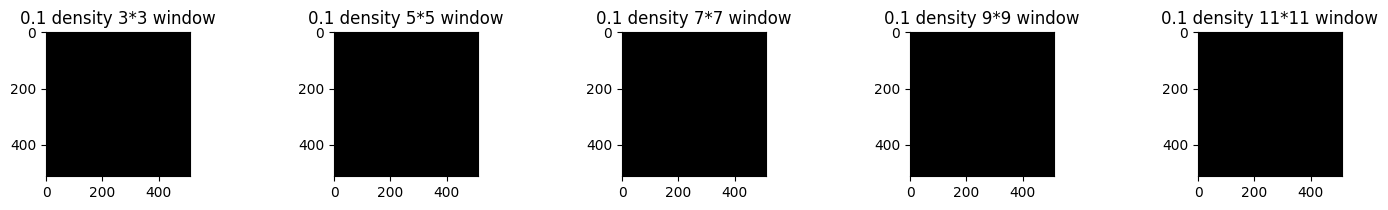

  window size           3*3           5*5           7*7           9*9  \
0     𝝆 = 0.2  20714.231468  20714.231468  20714.231468  20714.231468   

          11*11  
0  20714.231468  


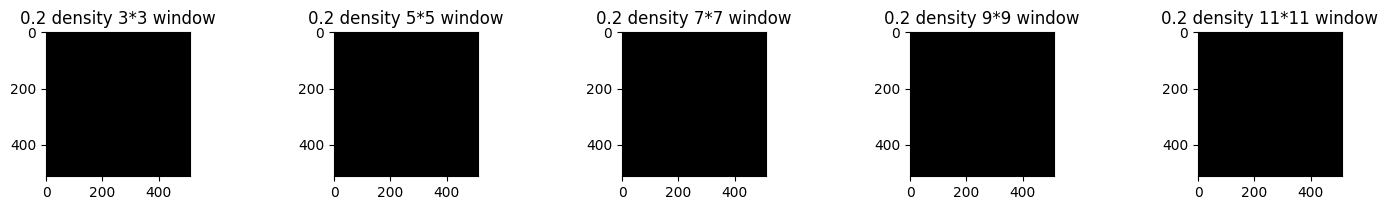

  window size           3*3           5*5           7*7           9*9  \
0     𝝆 = 0.4  20714.231468  20714.231468  20714.231468  20714.231468   

          11*11  
0  20714.231468  


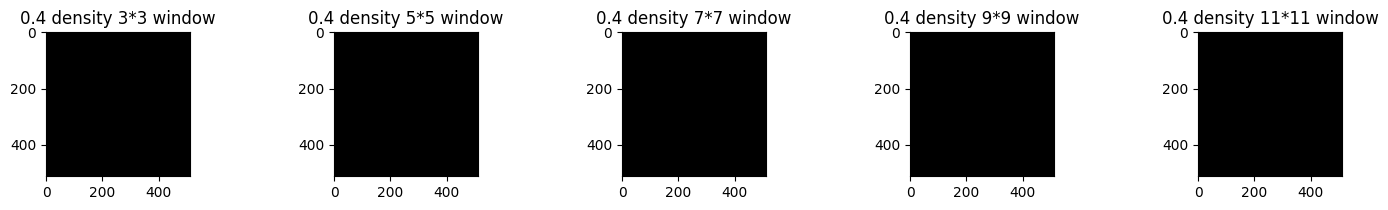

In [31]:
# practice 3.2.1

density = [0.05, 0.1, 0.2, 0.4]
window_size = [3,5,7,9,11]

# density = [0.05]
# window_size = [3]

noisyImages = []
for i in density:
  noisyImages.append(salt_pepper_noise(elaine, 0.5, i))


for i in range(len(density)):
  plot_image_little(noisyImages[i], i+1, '{} density'.format(density[i]))
plt.show()

for i in range(len(density)):
  filtered = median_filter_with_multiple_window_size(noisyImages[i], window_size)

  for j in range(len(filtered)):
     plot_image_little(filtered[j], j+1, '{} density {}*{} window'.format(density[i],window_size[j],window_size[j]))

  chart = pd.DataFrame([('𝝆 = {}'.format(density[i]),
               MSE(elaine, filtered[0]),
               MSE(elaine, filtered[1]),
               MSE(elaine, filtered[2]),
               MSE(elaine, filtered[3]),
               MSE(elaine, filtered[4]))],

              columns=('window size', '3*3', '5*5', '7*7', '9*9', '11*11'))

  print(chart)
  plt.show()

### practice 3.2.2

In [32]:
# practice 3.2.2

variance = [0.01, 0.05, 0.1]
window_size = [3,5,7,9,11]
noisyImages = []
data = []

for i in variance:
  noisyImages.append(gussian_noise(elaine, i))

for i in range(len(variance)):
  row = []
  # add box filter
  for j in window_size:
    filter = box_filter_cv2(noisyImages[i],j)
    row.append(MSE(elaine, filter))

  # add median filter
  for j in window_size:
    filter = median_filter(noisyImages[i],j)
    row.append(MSE(elaine, filter))

  data.append(row)

col = ['box 3*3','box 5*5','box 7*7','box 9*9','box 11*11','median 3*3','median 5*5','median 7*7','median 9*9','median 11*11',]
pd.DataFrame(data, index = ['𝝈 = 𝟎. 𝟎𝟏', '𝝈 = 𝟎. 𝟎𝟓', '𝝈 = 𝟎. 𝟏'], columns = col)


box 3*3    box 5*5    box 7*7    box 9*9  box 11*11  median 3*3  \
𝝈 = 𝟎. 𝟎𝟏  29.966309  36.814938  40.588097  45.606228  49.766441   65.493637   
𝝈 = 𝟎. 𝟎𝟓  29.957413  36.837292  40.612648  45.600239  49.770924   65.516205   
𝝈 = 𝟎. 𝟏   29.950706  36.832474  40.603729  45.603477  49.783321   65.487080   

           median 5*5  median 7*7  median 9*9  median 11*11  
𝝈 = 𝟎. 𝟎𝟏  107.149933  146.971729  191.618790    238.285992  
𝝈 = 𝟎. 𝟎𝟓  107.129868  146.972496  191.616962    238.285870  
𝝈 = 𝟎. 𝟏   107.142300  146.969799  191.605873    238.289066

# Practice 3.3

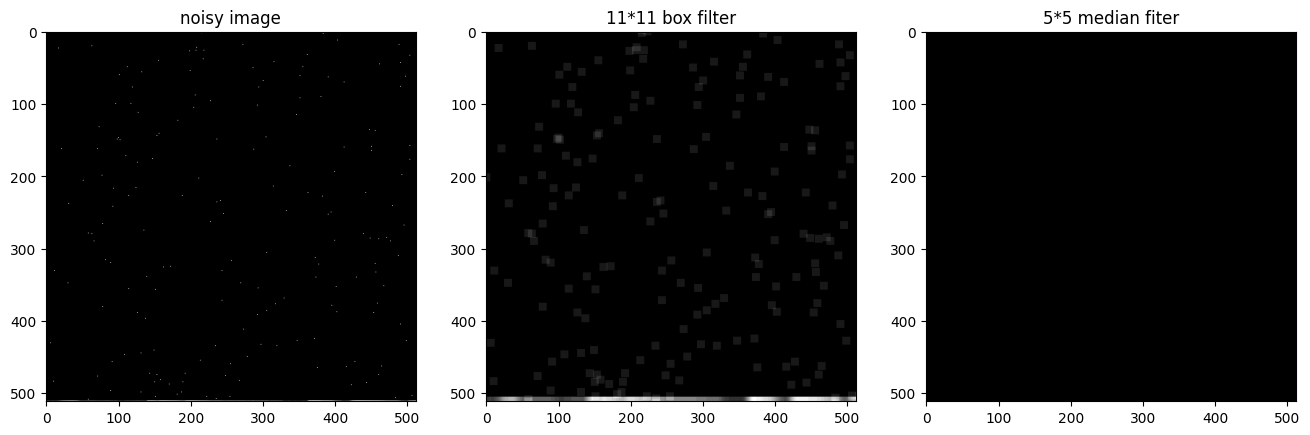

In [34]:
# practice 3.3

noisy = gussian_noise(salt_pepper_noise(elaine,0.5, 0.2))
plot_image(noisy,1, 'noisy image')
plot_image(box_filter_cv2(noisy, 11),2, '11*11 box filter')
plot_image(median_filter(noisy, 5),3, '5*5 median fiter')

# Practice 3.4



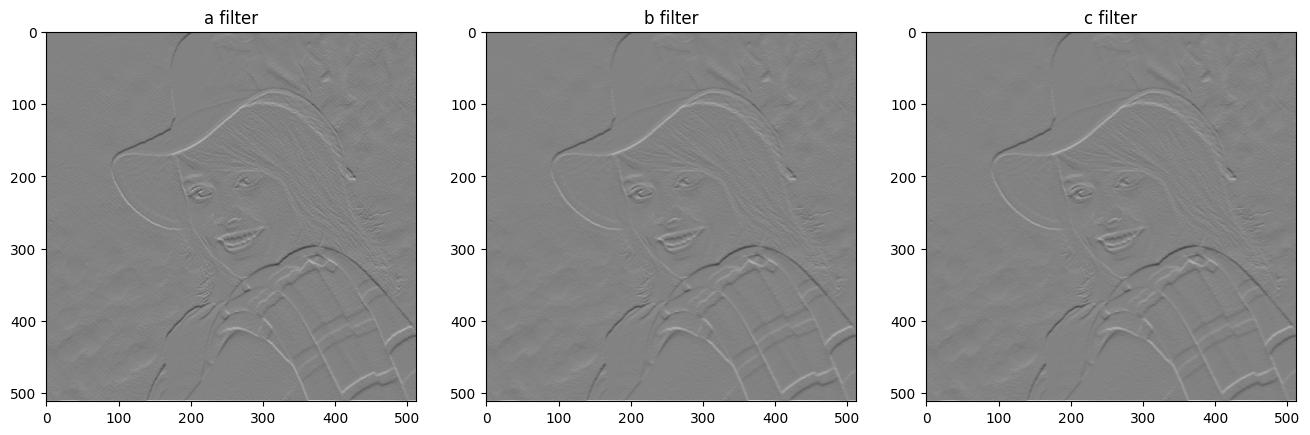

In [35]:
# practice 3.4

a_filter = a_x_dir_filter(elaine)
plot_image(a_filter, 1, 'a filter')

b_filter = b_x_dir_filter(elaine)
plot_image(b_filter, 2, 'b filter')

c_filter = c_x_dir_filter(elaine)
plot_image(c_filter, 3, 'c filter')



# Practice 3.5



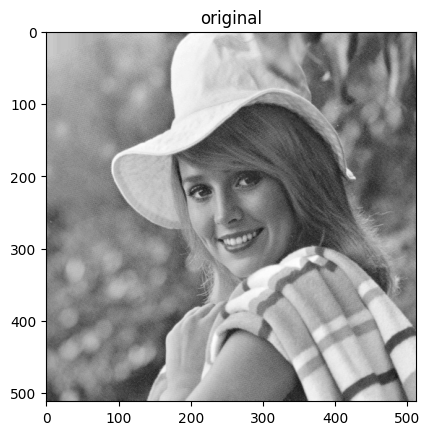

<ipython-input-18-1c1033ce6f7b>:6: RuntimeWarning: overflow encountered in scalar subtract
  diff[i][j] = (filter[i][j] - image[i][j])*alpha


[[  0.    0.    0.  ... 224.1   5.4   0. ]
 [  0.    0.    0.  ...   0.9 225.9  12.6]
 [  0.    0.    0.  ...   0.9   2.7   1.8]
 ...
 [225.9 225.9 227.7 ... 226.8 225.  226.8]
 [223.2 222.3 227.7 ... 229.5   2.7   2.7]
 [ 57.6 222.3 229.5 ... 229.5   0.9   0. ]]


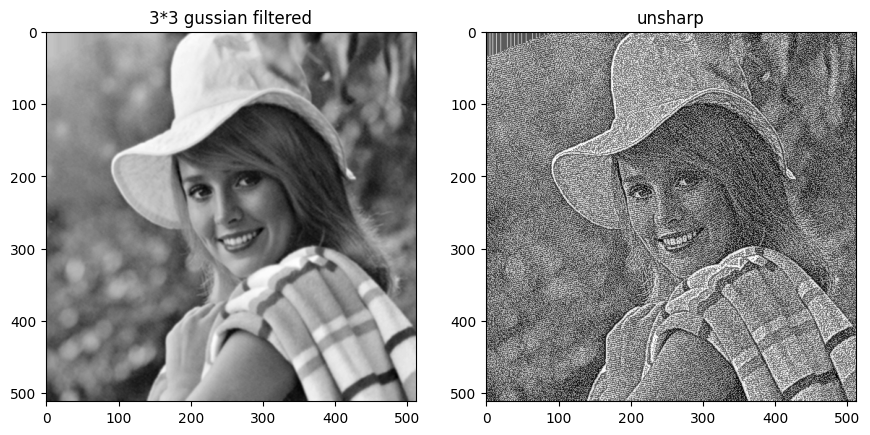

[[  0.    0.    0.  ... 224.1   9.    5.4]
 [  0.    0.    0.  ...   0.9 229.5  18.9]
 [  0.    0.    0.  ... 229.5   5.4   4.5]
 ...
 [223.2 223.2 225.  ... 225.9 224.1 225. ]
 [224.1 223.2 224.1 ... 227.7   1.8   1.8]
 [ 60.3 224.1 225.  ... 227.7   1.8   2.7]]


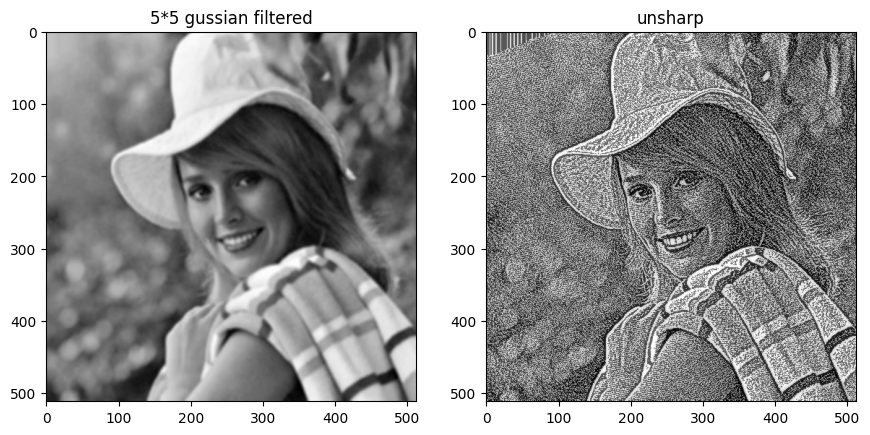

[[  0.    0.    0.  ... 226.8  13.5   9.9]
 [  0.    0.    0.  ...   3.6   1.8  22.5]
 [  0.    0.    0.  ...   1.8   9.    8.1]
 ...
 [224.1 224.1 226.8 ... 225.  223.2 225. ]
 [223.2 223.2 224.1 ... 227.7   0.    0.9]
 [ 57.6 222.3 224.1 ... 227.7   0.9   1.8]]


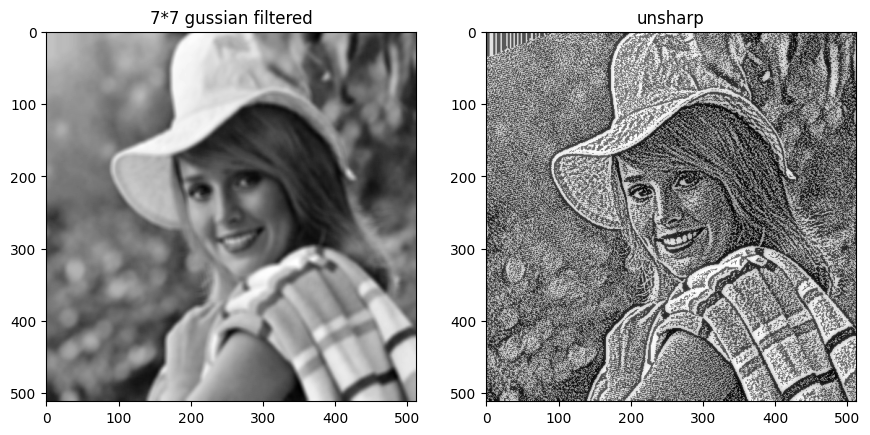

[[  0.    0.    0.  ... 229.5  16.2  12.6]
 [  0.    0.    0.  ...   6.3   5.4  25.2]
 [  0.    0.    0.  ...   4.5  11.7  10.8]
 ...
 [224.1 224.1 226.8 ... 225.  222.3 223.2]
 [222.3 222.3 224.1 ... 227.7   0.    0. ]
 [ 56.7 221.4 224.1 ... 226.8 229.5 229.5]]


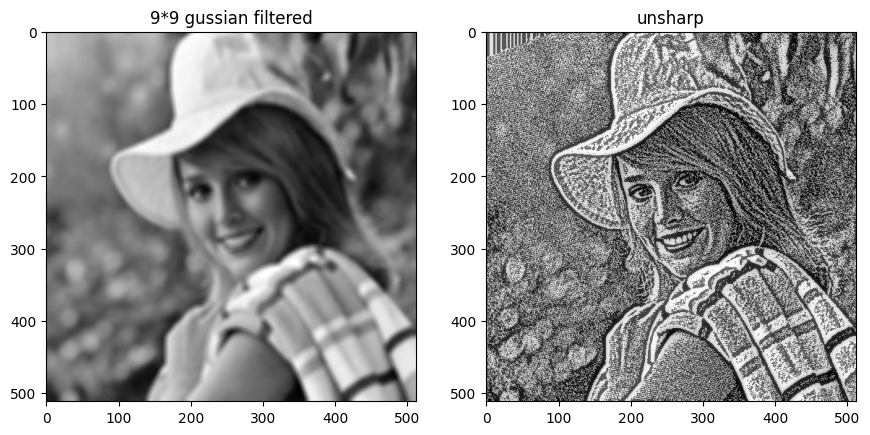

[[  0.    0.    0.9 ...   1.8  19.8  16.2]
 [  0.    0.    0.9 ...   9.    9.   28.8]
 [  0.    0.    0.9 ...   7.2  15.3  14.4]
 ...
 [223.2 223.2 226.8 ... 225.  221.4 222.3]
 [222.3 222.3 225.  ... 227.7 229.5 229.5]
 [ 56.7 222.3 225.  ... 227.7 229.5 229.5]]


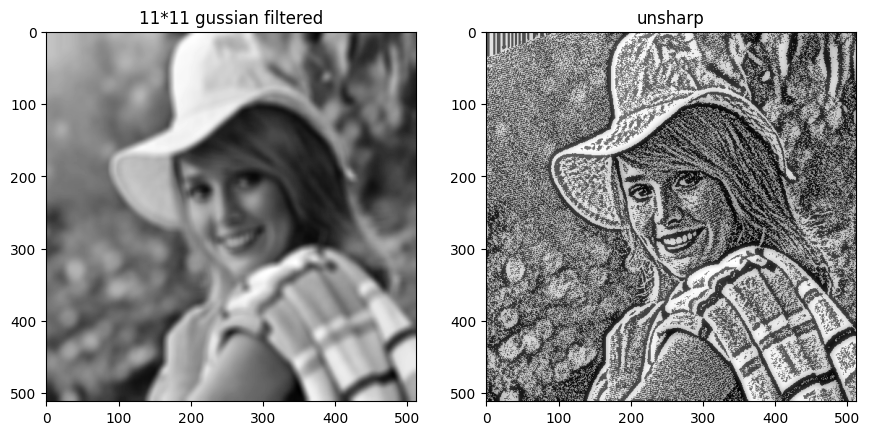

In [36]:
#practice 3.5

filter_size = [3,5,7,9,11]
plot_image(elaine, 1, 'original')
plt.show()

for i in filter_size:
  blur = cv2.GaussianBlur(elaine,(i,i),10)
  plot_image(blur, 1, '{}*{} gussian filtered'.format(i, i))
  plot_image(unsharp(elaine, blur, 0.9), 2, 'unsharp')
  plt.show()
